## Make demo data

In [1]:
from UTILITY_quickstart import *

In [2]:
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")

In [3]:
csrTF = False
#trackEnd = "PR15944"

bunchCount = importedDefaultSettings["bunchCount"]

tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    
    csrTF = csrTF,
    numMacroParticles=1e4,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

setLattice(tao, **importedDefaultSettings)
launchTwissCorrection(tao)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /tmp/beams/activeBeamFile_16170017857788765365.h5, and reinit to tao
No evalElement provided. Assuming golden lattice PR10571
Optimization Results:
Optimal Parameters: [28.77865964 13.39705392 23.51276157 16.83077823]
Objective Function Value at Optimal Parameters: 3.875225216013324e-12
Number of Iterations: 354
Converged: True


In [4]:
trackBeam(tao, trackEnd = "PR10571", **importedDefaultSettings)

In [5]:
PStart = getBeamAtElement(tao, "LH10END")
print(getBeamSpecs(PStart))
PStart.twiss()

{'PDrive_median_x': -7.820290234820003e-07, 'PDrive_median_y': 3.669508697689903e-06, 'PDrive_median_xp': 1.8478574101365557e-06, 'PDrive_median_yp': -3.8932810905611543e-07, 'PDrive_sigmaSI90_x': 0.00017926843656446514, 'PDrive_sigmaSI90_y': 0.0001525415438575228, 'PDrive_sigmaSI90_z': 0.0005732622075647287, 'PDrive_sigmaSI90_xp': 0.0001427161907664057, 'PDrive_sigmaSI90_yp': 7.928900032975641e-05, 'PDrive_emitSI90_x': 4.979988626685858e-06, 'PDrive_emitSI90_y': 2.930950716380755e-06, 'PDrive_norm_emit_x': 6.4829248232087125e-06, 'PDrive_norm_emit_y': 5.11390955338514e-06, 'PDrive_charge_nC': 1.6000000000000012}


{'alpha_x': -0.8880562099622552,
 'beta_x': 1.7931829184807706,
 'gamma_x': 0.9974686986020973,
 'emit_x': 2.6905043135885087e-08,
 'eta_x': -0.0009630865657575627,
 'etap_x': 0.0006844062138977451,
 'norm_emit_x': 6.482591249138419e-06}

In [6]:
tao.ele_twiss("LH10END")

{'mode_flip': False,
 'beta_a': 1.09821649452557,
 'alpha_a': -0.781206485498211,
 'gamma_a': 1.46627152388575,
 'phi_a': 5.08254789794399,
 'eta_a': -1.21430643318376e-17,
 'etap_a': 0.0,
 'beta_b': 2.09593213230205,
 'alpha_b': 0.38350744582814,
 'gamma_b': 0.547287740536589,
 'phi_b': 6.82740377689841,
 'eta_b': 0.0,
 'etap_b': 0.0,
 'eta_x': -1.21430643318376e-17,
 'etap_x': 0.0,
 'eta_y': 0.0,
 'etap_y': 0.0}

In [7]:
PEnd = getBeamAtElement(tao, "PR10571")
print(getBeamSpecs(PEnd))
PEnd.twiss()

{'PDrive_median_x': 1.0961642759940335e-07, 'PDrive_median_y': -9.672338840942929e-07, 'PDrive_median_xp': 1.9401052678987768e-07, 'PDrive_median_yp': -1.5356804029228892e-06, 'PDrive_sigmaSI90_x': 0.00029302479434631346, 'PDrive_sigmaSI90_y': 0.0002074011512563531, 'PDrive_sigmaSI90_z': 0.0005734009032130012, 'PDrive_sigmaSI90_xp': 0.0001449865939482277, 'PDrive_sigmaSI90_yp': 6.187237196946309e-05, 'PDrive_emitSI90_x': 4.406127447006126e-06, 'PDrive_emitSI90_y': 3.0679672053392994e-06, 'PDrive_norm_emit_x': 6.464295119169193e-06, 'PDrive_norm_emit_y': 5.111018001311856e-06, 'PDrive_charge_nC': 1.6000000000000012}


{'alpha_x': -3.0074912343547613,
 'beta_x': 6.893784403037553,
 'gamma_x': 1.4571101933931494,
 'emit_x': 2.682771961701437e-08,
 'eta_x': 0.003960158900341382,
 'etap_x': 0.0014162156157351336,
 'norm_emit_x': 6.463960661398779e-06}

In [8]:
tao.ele_twiss("PR10571")

{'mode_flip': False,
 'beta_a': 5.73666253544905,
 'alpha_a': -2.14411523511541,
 'gamma_a': 0.975694509981466,
 'phi_a': 7.31755704396,
 'eta_a': 4.44208173883061e-18,
 'etap_a': 2.39353339300433e-17,
 'beta_b': 2.57530224865125,
 'alpha_b': 0.0101621826097515,
 'gamma_b': 0.388344036308427,
 'phi_b': 8.22732356727666,
 'eta_b': -6.54597950722192e-37,
 'etap_b': -8.75519654512594e-38,
 'eta_x': 4.44208173883061e-18,
 'etap_x': 2.39353339300433e-17,
 'eta_y': -7.71096119937701e-37,
 'etap_y': 9.21848220971573e-38}

### Spot check

In [9]:
setQuadkG(tao, "QE10525", -10)
trackBeam(tao, trackEnd = "PR10571", **importedDefaultSettings)
PEnd = getBeamAtElement(tao, "PR10571")

transferMatrix = getMatrix(tao, "LH10END", "PR10571", print = True)

shot = {}
shot["R11"] = transferMatrix[0][0]
shot["R12"] = transferMatrix[0][1]

betaI = PStart.twiss()["beta_x"]
alphaI = PStart.twiss()["alpha_x"]

print(betaI, alphaI)

term1 = betaI * shot["R11"] ** 2
term2 = -2 * alphaI * shot["R11"] * shot["R12"]
term3 =  ( (1 + alphaI ** 2) / betaI ) * shot["R12"] ** 2

print( ( term1 + term2 + term3 ) )
print( PEnd.twiss()["beta_x"] )

-1.558227,4.467930,-0.000000,-0.000000,0.000000,-0.000000
-0.709160,1.391630,-0.000000,-0.000000,0.000000,-0.000000
0.000000,0.000000,-4.549610,-3.527921,0.000000,-0.000000
0.000000,0.000000,-2.306787,-2.008560,0.000000,0.000000
0.000000,-0.000000,0.000000,0.000000,1.000000,0.000074
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


1.7931829184807706 -0.8880562099622552
11.900463306371432
13.201380673211572


### Assemble data

In [10]:
dummyData = []

for quadSetting in np.arange(-10, 0, 1):

    setQuadkG(tao, "QE10525", quadSetting)

    transferMatrix = getMatrix(tao, "LH10END", "PR10571")

    trackBeam(tao, trackEnd = "PR10571", **importedDefaultSettings)

    
    P = getBeamAtElement(tao, "PR10571")
    #spotSize = smallestIntervalImpliedSigma(P.x)
    spotSize = P["sigma_x"]

    dummyData.append(
        {
            "quadSetting" : quadSetting,
            "R11" : transferMatrix[0][0],
            "R12" : transferMatrix[0][1],
            "sigma" : spotSize
        }
    )

In [11]:
dummyData

[{'quadSetting': -10,
  'R11': -1.55822732636512,
  'R12': 4.46793037201857,
  'sigma': 0.0005962108772497927},
 {'quadSetting': -9,
  'R11': -1.82424880215342,
  'R12': 3.94129536712872,
  'sigma': 0.0005037878201740523},
 {'quadSetting': -8,
  'R11': -2.08772690321794,
  'R12': 3.41925497802246,
  'sigma': 0.00043328935664285317},
 {'quadSetting': -7,
  'R11': -2.34867221106041,
  'R12': 2.90179064694699,
  'sigma': 0.0003954334795426163},
 {'quadSetting': -6,
  'R11': -2.60709527947151,
  'R12': 2.38888386404611,
  'sigma': 0.00039848020330595415},
 {'quadSetting': -5,
  'R11': -2.86300663458361,
  'R12': 1.88051616726989,
  'sigma': 0.00044057865527942334},
 {'quadSetting': -4,
  'R11': -3.11641677492343,
  'R12': 1.37666914228444,
  'sigma': 0.0005113338553205847},
 {'quadSetting': -3,
  'R11': -3.3673361714646,
  'R12': 0.877324422381807,
  'sigma': 0.0005999859969802583},
 {'quadSetting': -2,
  'R11': -3.61577526768015,
  'R12': 0.382463688390066,
  'sigma': 0.000699158159857177

## Generalized solver

In [12]:
def generalizedEmittanceSolverObjective(params, data):
    betaI, alphaI, emittanceGeo = params
    
    errorComponents = []

    for shot in data:
        # Twiss transfer matrix for beta
        # R11^2 \[Beta] - 2 R11 R12 \[Alpha] +  + R12^2 \[Gamma]
        term1 = betaI * shot["R11"] ** 2
        term2 = -2 * alphaI * shot["R11"] * shot["R12"]
        term3 =  ( (1 + alphaI ** 2) / betaI ) * shot["R12"] ** 2

        # (beta * emit_geo) == sigma^2
        errorComponent = ( term1 + term2 + term3 ) * emittanceGeo - shot["sigma"] ** 2

        #Add all error terms in quadrature
        errorComponents.append(errorComponent ** 2)
    
        
    
    return np.sum(errorComponents)

In [14]:
def generalizedEmittanceSolver(
    data,
    energyGeV = None
):
    """
    `data` should be a list of dictionaries, each of which should contain at least "R11", "R12", and "sigma" corresponding to the R-matrix terms for the transfer of interest
    and the beam sigma at the downstream screen.

    The the initial beta, alpha, and emittance are used as fit parameters to explain the observations
    The typical Twiss transfer is applied for each case and compared to the observed spot size
    """
    
    from scipy.optimize import minimize


    # Perform optimization using Nelder-Mead
    result = minimize(
        generalizedEmittanceSolverObjective, 
        [0.5, 0.5, 1e-9], #Starting point
        method='Nelder-Mead',
        args = (data, )
    )

                          
    # print("Optimization Results:")
    # print(f"Optimal Parameters: {result.x}")
    # print(f"Objective Function Value at Optimal Parameters: {result.fun}")
    # print(f"Number of Iterations: {result.nit}")
    # print(f"Converged: {result.success}")

    output = {"beta" : result.x[0], "alpha" : result.x[1], "emitGeo" : result.x[2]}

    if energyGeV:
        #Sloppy, ultrarel only
        output["emit"] = result.x[2] * energyGeV * 1000 / 0.511
    
    return output

In [15]:
generalizedEmittanceSolver(dummyData, energyGeV = 0.125)

Optimization Results:
Optimal Parameters: [ 1.62414570e+00 -9.09314659e-01  2.58886015e-08]
Objective Function Value at Optimal Parameters: 8.894880589077135e-20
Number of Iterations: 264
Converged: True


{'beta': 1.6241456986883478,
 'alpha': -0.9093146586013356,
 'emitGeo': 2.5888601538649748e-08,
 'emit': 6.3328281650317385e-06}

In [16]:
PStart.twiss()

{'alpha_x': -0.8880562099622552,
 'beta_x': 1.7931829184807706,
 'gamma_x': 0.9974686986020973,
 'emit_x': 2.6905043135885087e-08,
 'eta_x': -0.0009630865657575627,
 'etap_x': 0.0006844062138977451,
 'norm_emit_x': 6.482591249138419e-06}

## Try another case

In [27]:
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")

csrTF = False
#trackEnd = "PR15944"

bunchCount = importedDefaultSettings["bunchCount"]

tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    
    csrTF = csrTF,
    numMacroParticles=1e4,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

setLattice(tao, **importedDefaultSettings)
launchTwissCorrection(tao)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /tmp/beams/activeBeamFile_855814720493067643.h5, and reinit to tao
No evalElement provided. Assuming golden lattice PR10571
Optimization Results:
Optimal Parameters: [28.77865964 13.39705392 23.51276157 16.83077823]
Objective Function Value at Optimal Parameters: 3.875225216013324e-12
Number of Iterations: 354
Converged: True


In [28]:
trackBeam(tao, trackEnd = "PR15944", **importedDefaultSettings)

PStart = getBeamAtElement(tao, "IM14890")
print(getBeamSpecs(PStart))
PStart.twiss()

{'PDrive_median_x': -6.668778756107626e-07, 'PDrive_median_y': 2.1081727432857757e-07, 'PDrive_median_xp': -1.590168402456281e-06, 'PDrive_median_yp': 1.9493156925010468e-07, 'PDrive_sigmaSI90_x': 7.893474493796194e-05, 'PDrive_sigmaSI90_y': 4.8124813785466594e-05, 'PDrive_sigmaSI90_z': 3.8676074859785844e-05, 'PDrive_sigmaSI90_xp': 2.0599106678645193e-05, 'PDrive_sigmaSI90_yp': 1.2818569145780602e-05, 'PDrive_emitSI90_x': 1.0842492613625031e-05, 'PDrive_emitSI90_y': 3.0262636398405045e-06, 'PDrive_norm_emit_x': 1.3619071103880578e-05, 'PDrive_norm_emit_y': 4.667093647811138e-06, 'PDrive_charge_nC': 1.599680000000001}


{'alpha_x': 1.418505585256189,
 'beta_x': 6.004667679401755,
 'gamma_x': 0.501636103149526,
 'emit_x': 1.4505498486790861e-09,
 'eta_x': -0.0026543416886199924,
 'etap_x': 0.0004787328886296131,
 'norm_emit_x': 1.2581663049879037e-05}

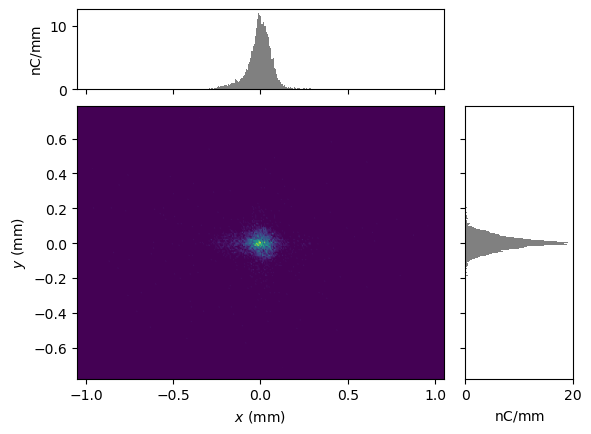

In [29]:
display(plotMod(PStart, 'x', 'y', bins=300))
plt.clf()

In [34]:
makeBeamActiveBeamFile(PStart, tao = tao)

dummyData = []

for quadSetting in np.arange(-50, 0, 5):

    setQuadkG(tao, "Q14901", quadSetting)

    transferMatrix = getMatrix(tao, "IM14890", "PR15944")

    trackBeam(tao, trackStart = "IM14890", trackEnd = "PR15944", **importedDefaultSettings)

    
    P = getBeamAtElement(tao, "PR15944")
    #spotSize = smallestIntervalImpliedSigma(P.x)
    spotSize = P["sigma_x"]

    dummyData.append(
        {
            "quadSetting" : quadSetting,
            "R11" : transferMatrix[0][0],
            "R12" : transferMatrix[0][1],
            "sigma" : spotSize
        }
    )

In [35]:
dummyData

[{'quadSetting': -50,
  'R11': -2.30392581350462,
  'R12': -6.37000849365709,
  'sigma': 0.00013577751422482566},
 {'quadSetting': -45,
  'R11': -2.10510311400088,
  'R12': -6.3289616512631,
  'sigma': 0.00012292059842864892},
 {'quadSetting': -40,
  'R11': -1.9065146556884,
  'R12': -6.28795698386624,
  'sigma': 0.00011188169912201663},
 {'quadSetting': -35,
  'R11': -1.70816031369718,
  'R12': -6.24699447009071,
  'sigma': 0.00010323299804955342},
 {'quadSetting': -30,
  'R11': -1.51003996319952,
  'R12': -6.20607408856769,
  'sigma': 9.759859723046343e-05},
 {'quadSetting': -25,
  'R11': -1.31215347941004,
  'R12': -6.1651958179355,
  'sigma': 9.549986351573562e-05},
 {'quadSetting': -20,
  'R11': -1.11450073758563,
  'R12': -6.12435963683943,
  'sigma': 9.715285514540403e-05},
 {'quadSetting': -15,
  'R11': -0.917081613025505,
  'R12': -6.08356552393188,
  'sigma': 0.0001023633917594132},
 {'quadSetting': -10,
  'R11': -0.719895981071124,
  'R12': -6.04281345787229,
  'sigma': 0.00

In [36]:
generalizedEmittanceSolver(dummyData, energyGeV = 4.5)

Optimization Results:
Optimal Parameters: [6.49745582e+00 1.40431305e+00 1.55831183e-09]
Objective Function Value at Optimal Parameters: 7.282008979858293e-27
Number of Iterations: 202
Converged: True


{'beta': 6.497455815236459,
 'alpha': 1.4043130522989928,
 'emitGeo': 1.5583118270451577e-09,
 'emit': 1.3722902586503345e-05}

In [37]:
PStart.twiss()

{'alpha_x': 1.418505585256189,
 'beta_x': 6.004667679401755,
 'gamma_x': 0.501636103149526,
 'emit_x': 1.4505498486790861e-09,
 'eta_x': -0.0026543416886199924,
 'etap_x': 0.0004787328886296131,
 'norm_emit_x': 1.2581663049879037e-05}